# Derivasjon av bilder

Når du har lært å derivere numerisk ved hjelp av programmering er det bare fantasien som setter grenser for hva som kan deriveres. I denne notebooken skal vi prøve å derivere bilder og undersøke hva det betyr. Det første vi trenger er å importere `pylab`. For denne notebooken trenger vi også en til funksjon, nemlig `imread` fra `imageio` pakken.

In [1]:
from pylab import *
from imageio import imread

For å laste inn et bilde kaller vi på imread og sender inn filnavnet. I vårt tilfelle ønsker vi også at bilde skal bli lastet inn som et gråtonebilde så vi sender inn nøkkelordargumentet `as_gray=True`. 

In [2]:
bildeside = 'https://github.com/kodeskolen/tekna_h20_videre/raw/master/dag2/notebooks/Numerisk%20derivasjon/bilder'

bildefil = 'dame_stripe_genser.png'
#bildefil = 'arkitektur.png'
#bildefil = 'zebra1.jpeg'
#bildefil = 'zebra2.jpeg'
#bildefil = 'dog.png'

img = imread(f'{bildeside}/{bildefil}', as_gray=True)

Når vi har lest in bildet kan vi printe det ut for å se på verdiene

In [3]:
print(img)

[[ 14.  13.  15. ... 153. 151. 148.]
 [ 14.  16.  19. ... 151. 154. 152.]
 [ 19.  22.  35. ... 153. 150. 155.]
 ...
 [213. 214. 214. ... 206. 206. 206.]
 [213. 213. 213. ... 206. 206. 206.]
 [211. 213. 213. ... 206. 206. 206.]]


Vi ser at bildet er et rutenett av tall. Dette er en 2D array og hvert element representerer en *piksel* i bildet. Tallene går fra 0 til 255 og et tall nærme 255 representerer en lys farge, mens et tall nærme 0 er sort. Slik er det datamaskinen ser alle bildene dine, som et rutenett av tall!

For å vise frem bildet kan vi kalle på funksjonen `imshow` og sende inn bildet som input

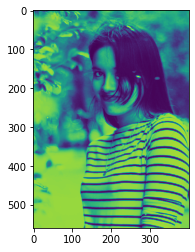

In [4]:
imshow(img)
show()

Vi ser at bildet har noen rare farger. Dette skjer automatisk med gråtonebilder med mindre vi spesifiserer at bildet er et gråtonebilde. For å gjøre det bruker vi følgende kode:

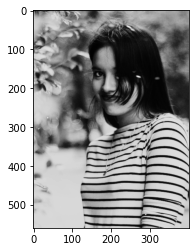

In [5]:
imshow(img, 'gray')
show()

Men hvordan deriverer vi bildet? Dette er ganske enkelt. Alt vi trenger å gjøre er å bruke den numeriske derivasjonsfunksjonen vi allerede har definert i derivasjonsnotebooken:

In [6]:
def deriver(avstandsmålinger, dt):
    antall_målinger = len(avstandsmålinger)
    fart = zeros(antall_målinger-1)
    
    for t in range(antall_målinger-1):
        fart[t] = (avstandsmålinger[t+1] - avstandsmålinger[t])/dt
        
    return fart

For å derivere bildet kan vi brøke en løkke for å løkke oss igjennom hver kolonne i bildet og bruke derivasjonsfunkjsonen\:

In [7]:
høyde, bredde = img.shape # hente ut høyde og bredde til bildet
derivert_bilde = zeros([høyde-1, bredde]) # lage en tom array for å lagre den deriverte

# løkke igjennom kolonnene i bildet, deriver dem og lagre resultatet i array
for kolonne in range(bredde):
    # her brukes 2d indeksering noe vi ikke har sett før
    # for nå trenger du bare å vite at du sender inn en koordinat for rader først og så kolonner
    # : betyr at man vil ha hele raden eller kolonnen (istedet for bare en verdi)
    # [:, kolonne] betyr altså at man vil ha hele kolonne nummer `kolonne`
    derivert_bilde[:,kolonne] = deriver(img[:,kolonne], 1)

La oss nå se på resultatet. Dette kan vi gjøre ved å igjen bruke `imshow`

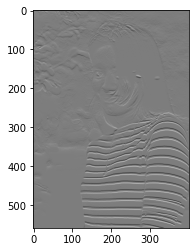

In [8]:
imshow(derivert_bilde, 'gray')
show()

Her ser vi at mesteparten av bildet er grått, med noen hvite og sorte streker. Dette bildet representerer "farten" til originalbildet. Og siden vi ikke er interessert i fortegnet til farten, bare størrelsen kan vi ta absoluttverdien

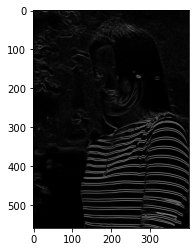

In [9]:
imshow(abs(derivert_bilde), 'gray')
show()

Nå har vi et bilde av "Farten" til originalbildet? Men hva betyr det? Hvor er det bildet har høy fart? Vi ser at stripene i genseren er tydelig tegnet inn. Hvorfor det? For å forstå dette må vi ta et skritt tilbake og tenke over hva et bilde inneholder. Som nevnt er et bilde en 2d array, et rutenett av tall. Hver kollonne i bildet er altså en 1d array, en stripe med tall akkurat som tallrekkene vi har behandlet før. For å illustrere dette kan vi hente ut rad nr. 200 og plotte den. 

Siden bildet er en 2d array må det indekseres over to akser. Det er litt som et koordinatsystem av indekser. Vi ønsker alle verdiene nedover, men kun en verdi bortover. Dette får vi med følgende kode:

In [10]:
kolonne = img[:, 200]

Et kolon uten tall forran og bak betyr at vi vil ha en slice som går over hele bildet, langs den aksen. Altså alle radene. Så har vi et komma for å indeksere i 2 dimensjoner og vi velger ut kolonne nr 200. Vi kan nå plotte raden som et linjeplot

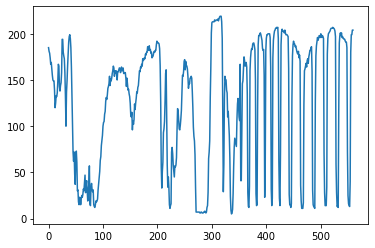

In [11]:
plot(kolonne)
show()

Hvis vi sammenligner dette med bildet ser vi at linja går opp der bildet er lyst og ned der bildet er mørkt. Vi ser også et tydelig sikk-sakk mønster på slutten. Dette stemmer overens med stripene i genseren nederst på bildet. Så hva vil det si å derivere en slik kurve? Vi vet at den deriverte er høy der det er rask endring. Altså der forskjellen på verdien mellom to punkter etter hverandre er høy. Hva vil det si for denne kurven? Endringene er størst der det er en brå overgang mellom farger. I bildet betyr det at vi har en kant. Og det er tydeligst kanter i stripene i genseren. 

For å se nærmere på dette kan vi også plotte den deriverte av kolonne 200. Vi tar absoluttverdien siden vi kunn er interessert i størrelsen på farten, ikke fortegnet.  

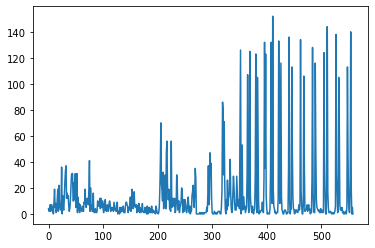

In [12]:
plot(abs(derivert_bilde[:, 200]))
show()

Dette stemmer jo godt med intuisjonen. Den deriverte er veldig lav mellom rad 100 og 200. Hvis vi ser på bildet ser vi at det området er stort sett bare svart. Det er nærmest konstant og har ingen tydelige kanter. Derimot er den deriverte høy der hvor stripene i genseren skifter fra hvit til sort og tilbake igjen, der er det tydelige kanter. 

Nå lurer du kanskje på hvorfor dette er nyttig. Det er jo morsomt å se hva som skjer når man deriverer et bilde og hva det betyr, men kan dette brukes til noe? Svaret er ja. I maskinsyn er kantdeteksjon en viktig problemstilling og derivasjon er den mest populære teknikken. Kanter inneholder ofte den viktigste informasjonen i et bilde og når du har funnet kantene brukes det videre i mer sofistikerte algoritmer i kombinasjon med annen informasjon. I dag er maskinsyn blitt såpass avansert at det er gjerne tusenvis av forskjellige egenskaper som kombineres, men kantene er fortsatt svært viktige. Slik bildederivasjon er altså grunnlaget for dagens teknologi som bruker kantinformasjon for å detektere alt fra ansikter i snapchat-vinduet ditt til kreftceller i medisinske bilder!

### Oppgave 1a) 
Modifiser notebooken til å derivere `"arkitektur.png"` fra `"bilder"` mappen. Plot resultatet. Hvordan ser den deriverte ut? Hvilke elementer i bildet er det som blir fremhevet av derivasjonen?

### Oppgave 2 a)

I forrige oppgave deriverte vi kolonnene i arkitekturbildet, og da fant vi vertikale kanter. Hva tror du skjer dersom vi heller deriverer radene i bildet? Hvilke deler av bildet tror du da blir fremhevet av derivasjonen?

### Oppgave 2b)
Under har vi kode som vi kan bruke for å derivere radene i et bilde. Kjør koden, fikk du det resultatet du forventet?

In [13]:
høyde, bredde = img.shape 
rad_derivert_bilde = zeros([høyde, bredde-1])

# løkke igjennom kolonnene i bildet, deriver dem og lagre resultatet i array
for rad in range(høyde):
    rad_derivert_bilde[rad, :] = deriver(img[rad, :], 1)

Så viser vi frem absoluttverdien til det rad-deriverte bildet

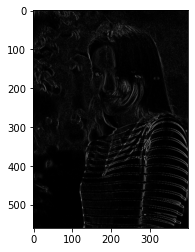

In [14]:
imshow(abs(rad_derivert_bilde), 'gray')
show()

### Oppgave 3 a)
Nå har vi to sett med kant-bilder, et kant-bilde som viser de vertikale kantene i det originalebildet og et som viser de horisontale kantene. For hver pixel i bildet har vi med andre ord to observasjoner, og dette kan vi tolke som en vektor. Vi har med andre ord en kant-vektor for hver pixel i originalbildet vårt.

Hva tror du skjer dersom vi, for hver pixel, regner ut størrelsen på vektoren med Pytagoras' setning?

### Oppgave 3b)
Under har vi kode som regner ut størrelsen på hver pixel-vektor og viser frem bildet, stemmer det med det du trodde?

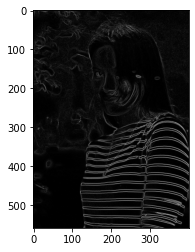

In [15]:
kantbilde = sqrt(derivert_bilde[:, 1:]**2  + rad_derivert_bilde[1:, :]**2)

imshow(kantbilde, 'gray')
show()